# Gillespie algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scienceplots
import os
plt.style.use('science')

In [3]:
def brusselator_gillespie(Omega, a = 2.0, b = 5.0, t_max = 50.0):
    # Initial value
    X, Y = int(a * Omega), int(b * Omega)
    t = 0.0
    T, X_hist, Y_hist = [0.0], [X], [Y]

    while t < t_max:
        w1 = a * Omega
        w2 = X
        w3 = (1.0 / Omega**2) * X * (X - 1) * Y
        w4 = b * X
        W_tot = w1 + w2 + w3 + w4
        
        if W_tot == 0: break
        # Extract the residence time
        t += -np.log(np.random.random()) / W_tot
        # Extract where to jump to
        r = np.random.random() * W_tot
        
        if r < w1:
            X += 1
        elif r < w1 + w2:
            X -= 1
        elif r < w1 + w2 + w3:
            X += 1; Y -= 1
        else:
            X -= 1; Y += 1
            
        T.append(t); X_hist.append(X); Y_hist.append(Y)
        
    return np.array(T), np.array(X_hist)/Omega, np.array(Y_hist)/Omega
t, x, y = brusselator_gillespie(1000)

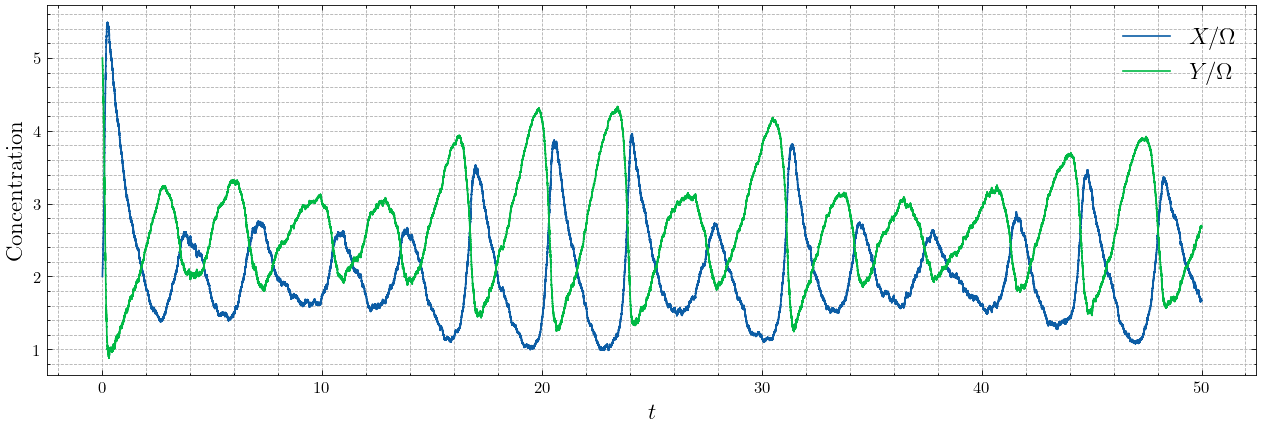

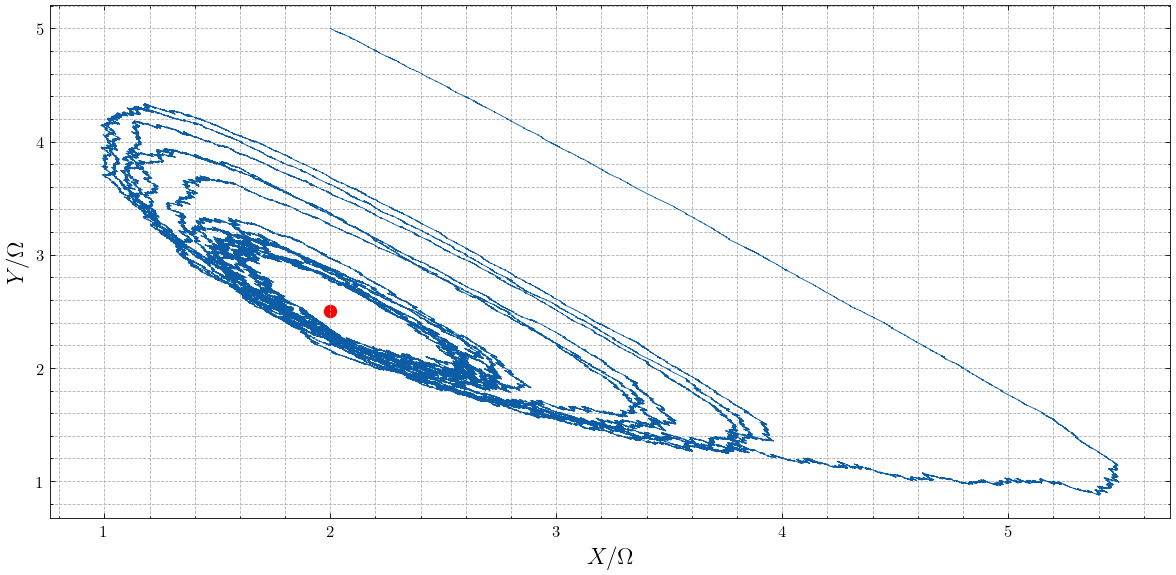

In [ ]:
plt.figure(figsize=(13, 4),dpi = 120)

plt.step(t, x, label='$X/\Omega$')
plt.step(t, y, label='$Y/\Omega$')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('Concentration', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Brusselator_TimeSeriesOmega1000.pdf', dpi=300)
plt.show()

# Histogram of residence time
plt.figure(figsize=(10, 5), dpi = 120)
plt.plot(x, y, lw=0.5)
plt.xlabel('$X/\Omega$', fontsize=14)
plt.ylabel('$Y/\Omega$', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.scatter(2.0, 2.5, color='red', s=50)
plt.tight_layout()
#plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Brusselator_PhaseSpaceOmega1000.pdf', dpi=300)
plt.show()

In [5]:
Omegas = [100, 1000, 10000]
times = []
xs = []
ys = []
for i, Om in enumerate(Omegas):
    t, x, y = brusselator_gillespie(Om)
    times.append(t)
    xs.append(x)
    ys.append(y)

In [12]:
def solve_brusselator_ode(a=2, b=5, t_max=50):
    def model(z, t):
        x, y = z
        dxdt = a - (b + 1) * x + x**2 * y
        dydt = b * x - x**2 * y
        return [dxdt, dydt]

    t = np.linspace(0, t_max, 1000)
    
    z0 = [a, b]
    sol = odeint(model, z0, t)
    
    return t, sol[:, 0], sol[:, 1] 
t, x, y = solve_brusselator_ode(a=2, b=5)

In [ ]:
# Plot Xs and Ys evolution of all three Omegas:
plt.figure(figsize=(13, 10))
plt.subplot(2, 1, 1)
for i in range(len(Omegas)):
    plt.plot(times[i][::10], xs[i][::10], label=f'$\\Omega={Omegas[i]}$')
plt.plot(t, x, 'k--', label='Deterministic ODE', lw=1.8)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x(t)$', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)
for i in range(len(Omegas)):
    plt.plot(times[i][::10], ys[i][::10], label=f'$\\Omega={Omegas[i]}$')
plt.plot(t, y, 'k--', label='Deterministic ODE', lw=1.8)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14)
plt.legend(fontsize=14, loc = 'best')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Brusselator_TimeSeries.pdf', dpi=300)
plt.show()


plt.figure(figsize=(20, 5), dpi = 120)
for i in range(len(Omegas)):
    plt.subplot(1, len(Omegas)+1, i+1)
    plt.plot(xs[i][::10], ys[i][::10], lw=0.5)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.scatter(2.0, 2.5, color='red', s=50)
    plt.title(f'$\\Omega={Omegas[i]}$', fontsize=14)

plt.subplot(1, len(Omegas)+1, len(Omegas)+1)
plt.plot(x, y, lw=1.0, color='black')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.scatter(2.0, 2.5, color='red', s=50)
plt.title('Deterministic ODE', fontsize=14)
plt.tight_layout()
plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Brusselator_PhaseSpace.pdf', dpi=300)
plt.show()